<a href="https://colab.research.google.com/github/SatyamSingh-Git/SMS_Spam_Classifier/blob/master/SMS_soam_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #importing the required libraries
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1') # the datset is not encoded in the utf-8, so using the latin-1 encodings

In [ ]:
df.sample(5) # showing the sample of 5 dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3059,ham,K..k...from tomorrow onwards started ah?,NaN,NaN,NaN
4032,ham,I am taking you for italian food. How about a ...,NaN,NaN,NaN
1167,ham,Lol now I'm after that hot air balloon!,NaN,NaN,NaN
43,ham,WHO ARE YOU SEEING?,NaN,NaN,NaN
3903,spam,Your 2004 account for 07XXXXXXXXX shows 786 un...,NaN,NaN,NaN


In [ ]:
df.shape #Finding the number of rows and column

(5572, 5)

## From here actual model will begin

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evalution
6. Improvement
7. Website
8. Deploying

### 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
# renaming the columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
2058,ham,Ugh fuck it I'm resubbing to eve
2576,ham,In sch but neva mind u eat 1st lor..
2486,ham,I dont thnk its a wrong calling between us
3888,ham,Unlimited texts. Limited minutes.
853,ham,\AH POOR BABY!HOPE URFEELING BETTERSN LUV! PRO...


In [ ]:
#importing the label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Encoding the target values into numbers
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Checking if there are any null values present in the datset
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# Checking for the number of duplicate values
df.duplicated().sum()

403

In [ ]:
# droping the duplicate values and just keeping the first values occurance of those
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

### 2. EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Chexking the number of spam and ham sms in the dataset
df['target'].value_counts()

,count
target,
0,4516
1,653


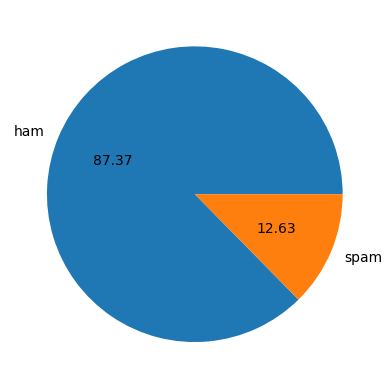

In [ ]:
# representing the dataset in the the pie chart form
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
import nltk # natural language tool kit

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_charecters']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# fetching the number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# fetching the number of words
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Analysing the datset
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Analysing the ham sms
df[df['target']==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Analysing the spam sms
df[df['target']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

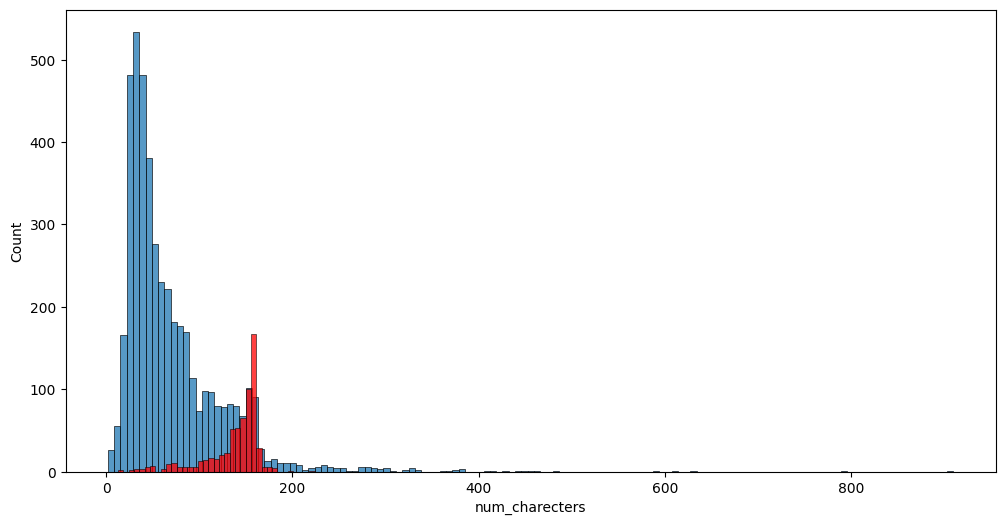

In [ ]:
#plotting hisogram

import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

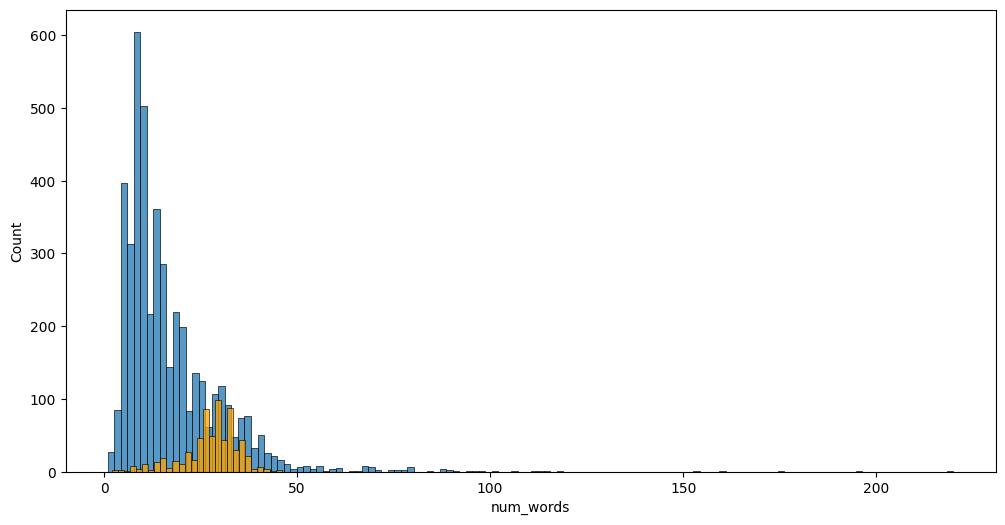

In [ ]:
#plotting hisogram

import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='orange')

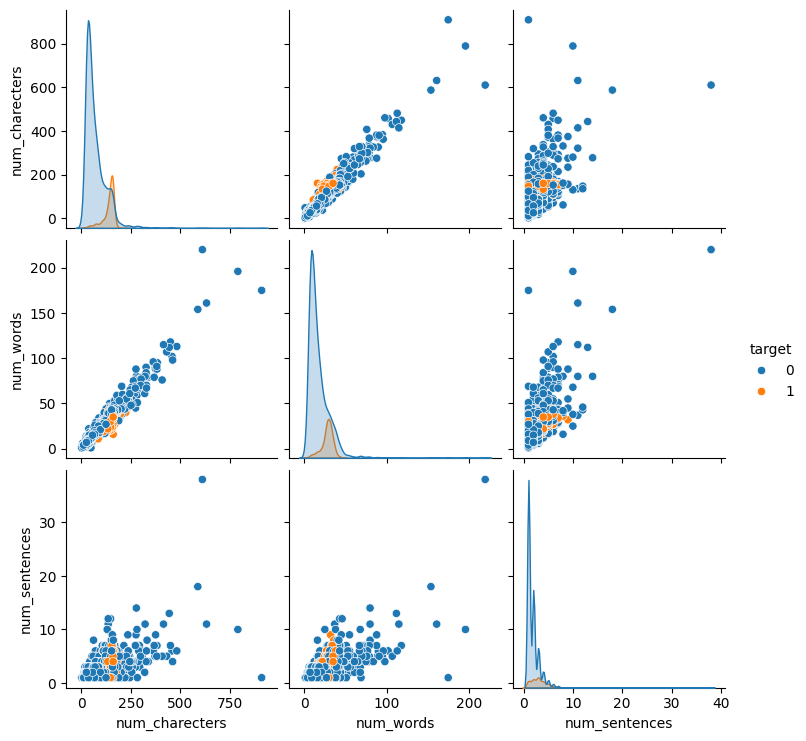

In [ ]:
sns.pairplot(df, hue='target')

<Axes: >

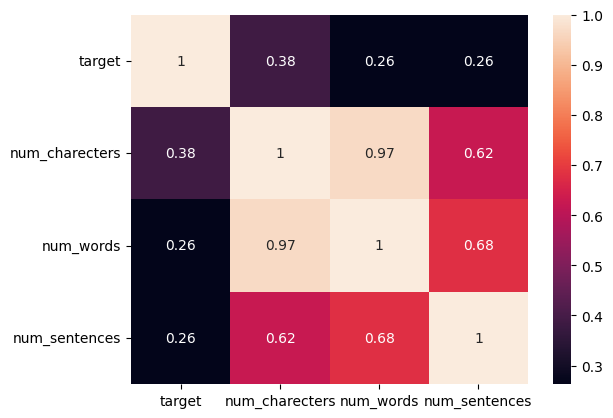

In [ ]:
# Convert 'num_charecters', 'num_words', and 'num_sentences' columns to numeric values
for col in ['num_charecters', 'num_words', 'num_sentences']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate the correlation matrix only for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].corr()

# Generate the heatmap using the correlation matrix of numerical features
sns.heatmap(corr_matrix, annot=True)

### Data Preprocessing
 1. Lower case
 2. Tokenization
 3. Removing special charecters
 4. Removing the stop words and punctuation
 5. stemming

In [ ]:
# creating a functioj to transform the text
from nltk.corpus import stopwords # Importing the stopwords module
nltk.download('stopwords')
import string

from nltk.stem.porter import PorterStemmer # Removes the ing, es, s, d etc, from the back of the word
ps = PorterStemmer()

def transform_text(text):
  text = text.lower()   #lower case conversion
  text = nltk.word_tokenize(text) # tokenizing the inmput text

  y =[]  # holding the transformed text
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

#stop words are the words those have no contribution in the meaning of the sentence
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  # return y
  # ['hi', 'nitish', 'love']

  return " ".join(y)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
transform_text("Hi how are you %%  Nitish, i am loving you?")

'hi nitish love'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

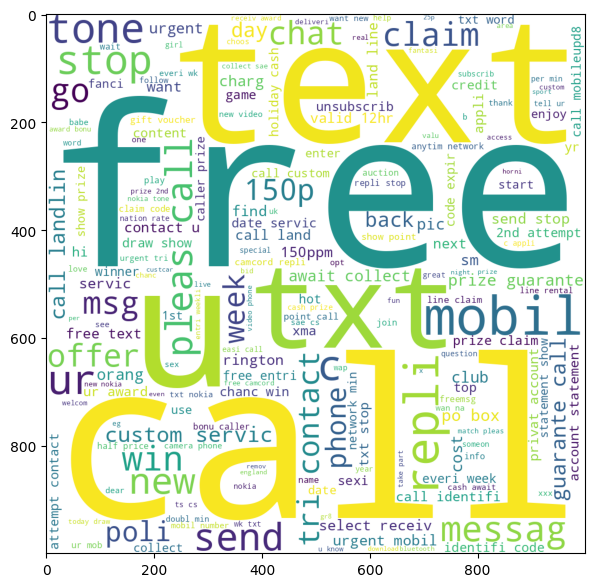

In [ ]:
plt.figure(figsize=(16,7))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

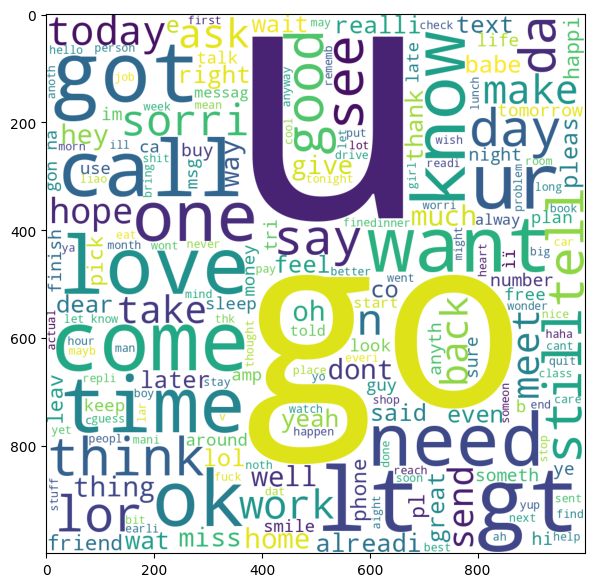

In [ ]:
plt.figure(figsize=(16,7))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


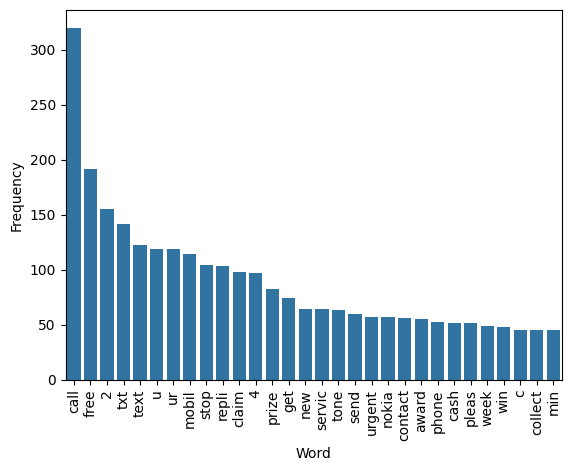

In [ ]:
# Convert the word frequencies to a DataFrame
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using the DataFrame and specifying the 'x' and 'y' columns
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical') # Rotate x-axis labels for better readability
plt.show()

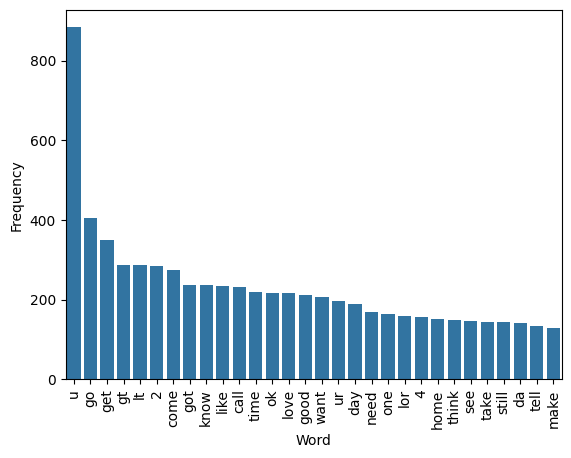

In [ ]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

# Convert the word frequencies to a DataFrame
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using the DataFrame and specifying the 'x' and 'y' columns
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df)
plt.xticks(rotation='vertical') # Rotate x-axis labels for better readability
plt.show()

### Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = cv.fit_transform(df['transformed_text']).toarray() #cv

X = tfidf.fit_transform(df['transformed_text']).toarray() #tfidf

In [ ]:
x.shape #cv

(5169, 6708)

In [ ]:
X.shape #tfidf

(5169, 3000)

In [ ]:
y = df['target'].values

## using Cout Vetrizer

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## using TFidf

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# Model Improvement
1. changed the features sizze in th tfidf to 3000 and that increased the mnb accuracy from 95 percent to 97 percent

2. no other improvements found

In [ ]:
# **The** Best model found till now is tfidf =>> mnb

In [ ]:
import pickle
pickle.dump(tfidf, open('vecterizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))